##Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv('breast_cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#exploring statstical data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

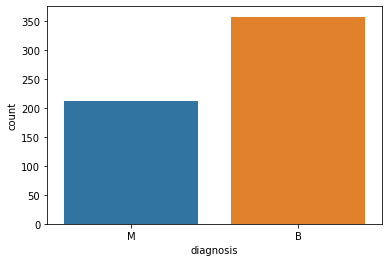

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [16]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [17]:
df['benign_0_mal_1'] = df.diagnosis.map({'M':1,'B':0})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [20]:
df.drop('diagnosis',axis=1,inplace=True)

In [21]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<AxesSubplot:>

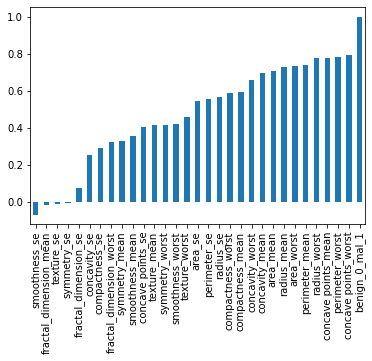

In [22]:
df.corr()['benign_0_mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

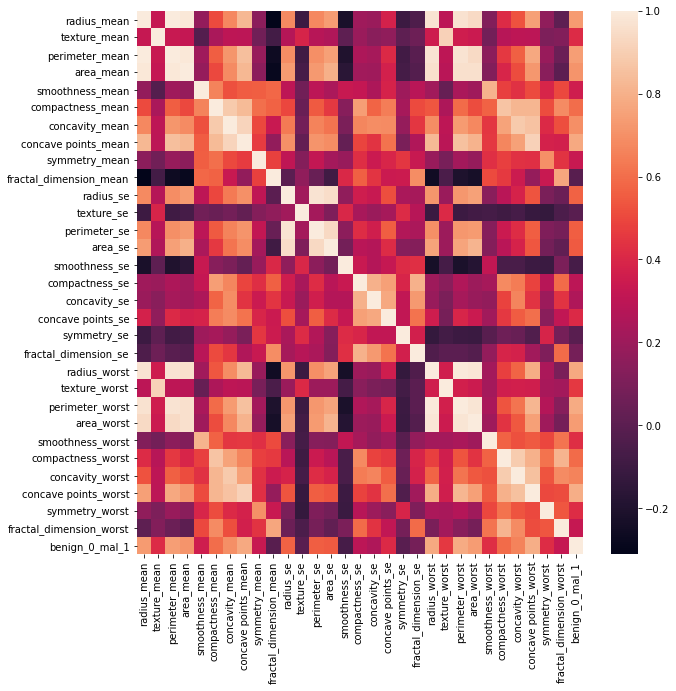

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [24]:
X =df.drop('benign_0_mal_1',axis=1).values

In [25]:
y=df['benign_0_mal_1'].values

In [26]:
X.shape

(569, 30)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
X_test = scaler.fit_transform(X_test)

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense,Dropout

In [35]:
X_train.shape

(398, 30)

In [36]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary classification model so sigmoid
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [37]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 14ms/step - loss: 0.6742 - val_loss: 0.6715
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6468 - val_loss: 0.6477
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6229 - val_loss: 0.6208
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5931 - val_loss: 0.5879
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5546 - val_loss: 0.5427
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5089 - val_loss: 0.4936
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4648 - val_loss: 0.4477
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4165 - val_loss: 0.4144
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3739 - val_loss: 0.3661
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3371 - val_loss: 0.3400
Epoch 11

13/13 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.3450
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0447 - val_loss: 0.3161
Epoch 85/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.3178
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.3184
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.3123
Epoch 88/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.3240
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0460 - val_loss: 0.3421
Epoch 90/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - val_loss: 0.3313
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.3193
Epoch 92/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - val_loss: 0.3392
Epoch 93/600


13/13 [==============================] - 0s 7ms/step - loss: 0.0296 - val_loss: 0.4063
Epoch 165/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.4559
Epoch 166/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.4197
Epoch 167/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.4664
Epoch 168/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.4732
Epoch 169/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0297 - val_loss: 0.4054
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.4483
Epoch 171/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0304 - val_loss: 0.4575
Epoch 172/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0290 - val_loss: 0.4018
Epoch 173/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.4690
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.5489
Epoch 246/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0201 - val_loss: 0.5674
Epoch 247/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.6158
Epoch 248/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.5739
Epoch 249/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.5949
Epoch 250/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.5583
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.6022
Epoch 252/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.6024
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0195 - val_loss: 0.5877
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.5544
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.7737
Epoch 327/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0120 - val_loss: 0.7421
Epoch 328/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0122 - val_loss: 0.8053
Epoch 329/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.7898
Epoch 330/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0123 - val_loss: 0.7348
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.7845
Epoch 332/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.7164
Epoch 333/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0139 - val_loss: 0.8922
Epoch 334/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.7947
Epoch 335/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0140 - val_loss: 0.8767
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.9602
Epoch 408/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.9809
Epoch 409/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 1.0081
Epoch 410/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 1.0324
Epoch 411/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.9851
Epoch 412/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.9878
Epoch 413/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.9849
Epoch 414/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.9592
Epoch 415/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 1.0372
Epoch 416/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.9735
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 1.1007
Epoch 489/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 1.2233
Epoch 490/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.1681
Epoch 491/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 1.2413
Epoch 492/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 1.2022
Epoch 493/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 1.2144
Epoch 494/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.2095
Epoch 495/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 1.2619
Epoch 496/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.2199
Epoch 497/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.2441
Epoc

13/13 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 1.4216
Epoch 570/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 1.4833
Epoch 571/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 1.4401
Epoch 572/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 1.4670
Epoch 573/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 1.4138
Epoch 574/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 1.4634
Epoch 575/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 1.4391
Epoch 576/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 1.4342
Epoch 577/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 1.4160
Epoch 578/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 1.4360
Epoc

In [38]:
losses = pd.DataFrame(model.history.history)

In [40]:
losses

,loss,val_loss
0,0.674241,0.671546
1,0.646766,0.647672
2,0.622850,0.620802
3,0.593138,0.587908
4,0.554602,0.542736
...,...,...
595,0.001449,1.495779
596,0.001297,1.525778
597,0.001444,1.504276
598,0.001436,1.484937


<AxesSubplot:>

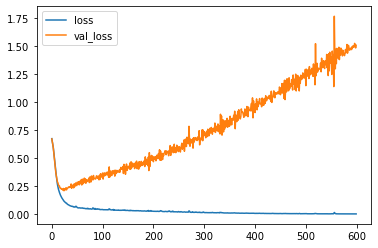

In [41]:
losses.plot()

#overfitting from figure
#using early stoping method

In [43]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary classification model so sigmoid
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [46]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
#for loss mode is min
#foe accuracy is max

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6748 - val_loss: 0.6633
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6481 - val_loss: 0.6363
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6208 - val_loss: 0.6096
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5924 - val_loss: 0.5767
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5570 - val_loss: 0.5371
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5128 - val_loss: 0.4940
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4659 - val_loss: 0.4474
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4216 - val_loss: 0.4066
Epoch 9/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3780 - val_loss: 0.3665
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3402 - val_loss: 0.3323
Epoch 11/

In [48]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

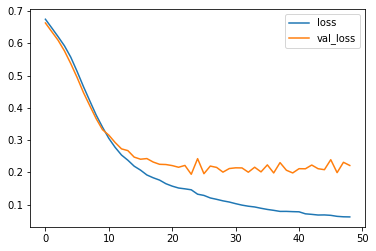

In [49]:
model_loss.plot()

#adding dropout to prevent over fitting

In [52]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#Binary classification model so sigmoid
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [53]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6898 - val_loss: 0.6865
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6734 - val_loss: 0.6646
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6721 - val_loss: 0.6451
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6539 - val_loss: 0.6244
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6371 - val_loss: 0.6047
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6179 - val_loss: 0.5795
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5993 - val_loss: 0.5491
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5732 - val_loss: 0.5228
Epoch 9/600
13/13 [==============================] - 0s 13ms/step - loss: 0.5425 - val_loss: 0.4895
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 0.4581
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1995
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1039 - val_loss: 0.1886
Epoch 85/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0942 - val_loss: 0.1950
Epoch 00085: early stopping


In [54]:
model_loss_dropout=pd.DataFrame(model.history.history)

<AxesSubplot:>

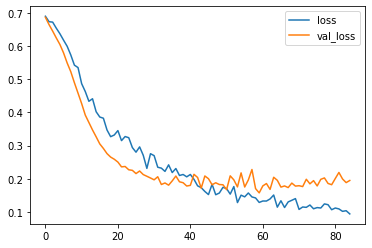

In [55]:
model_loss_dropout.plot()

In [57]:
predictions=model.predict_classes(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       105
           1       0.85      0.95      0.90        66

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [61]:
print(confusion_matrix(y_test,predictions))

[[94 11]
 [ 3 63]]
